##  아래 가이드에 따라서 1000명의 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.
고객별 속성 데이터
- id : 1 ~ 1000 고객 번호
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- no : 1 ~ 10000번 일련번호
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_21
- amount_21 : price_21 * quantity_21

#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요

#### Q3. df 를 탐색적 분석을 통하여 인사이트를 도출하세요.


In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
import time

In [2]:
# 고객 속성 데이터프레임 만들기

random.seed(1)

#고객별 속성 데이터프레임 만들기

cusno=np.arange(1001,2001)
#cusno=random.sample(list(range(1000,9000)),1000)
gender=np.random.choice([0,1],size=1000)
age=np.random.randint(10,81,size=1000)
region=np.random.randint(1,11,size=1000)

In [3]:
cusno=pd.Series(cusno)
gender=pd.Series(gender)
age=pd.Series(age)
region=pd.Series(region)

#시리즈 합쳐서 데이터프레임 만들기
customer=pd.concat([cusno,gender,age,region],axis=1)

#컬럼명 지정
customer.columns=['cusno','gender','age','region']

customer.head()

,cusno,gender,age,region
0,1001,0,33,4
1,1002,1,43,7
2,1003,0,71,10
3,1004,1,33,9
4,1005,1,75,2


In [4]:
# 거래 데이터프레임 만들기
tdf = pd.DataFrame(columns=['pur_id','cusno','product','price','quantity','amount'])
#기본거래 데이터 만들기

#1. 거래 id 만들기
pur_id=random.sample(list(range(10000,50000)),10000)

#2. 중복 cusno 만들기
cusno=np.random.randint(1001,2001,size=10000)   #기존 cusno가 중복될 수 있도록 만들기

#3. 기본거래 데이터 만들기
product=np.random.choice([10,20,30],size=10000)
# product=[random.randrange(10,40,10) for i in range(10000)]
price=np.random.uniform(1000,50000,size=10000).round(2)
quantity=np.random.randint(1,100,size=10000)
amount=price*quantity

tdf['pur_id'] = pur_id
tdf['cusno'] = cusno
tdf['product']=product
tdf['price']=price
tdf['quantity']=quantity
tdf['amount']=amount

date_list = list(pd.date_range('2020-01-01','2021-12-31',freq='D'))
tdf['date'] = np.random.choice(date_list, size=10000)

# day(요일)
tdf['day']=tdf['date'].apply(lambda x: x.weekday())  #date별 요일을 숫자로 나타냄
tdf['day']=tdf['day'].replace(list(range(7)),['월','화','수','목','금','토','일'])

# 시간
tdf['time']=np.random.randint(1,25,size=10000)

tdf.head()

,pur_id,cusno,product,price,quantity,amount,date,day,time
0,18805,1584,20,42436.75,39,1655033.25,2020-08-19,수,19
1,47303,1396,30,49440.53,77,3806920.81,2021-10-16,토,18
2,14135,1064,20,22618.48,75,1696386.00,2020-10-18,일,19
3,26716,1798,10,8866.03,7,62062.21,2020-12-12,토,17
4,17727,1834,20,45521.42,83,3778277.86,2020-01-02,목,8


In [5]:
tdf['pur_id']=tdf.apply(lambda x: str(x.date.year-2000)+str(x.pur_id), axis=1)
tdf.head()

,pur_id,cusno,product,price,quantity,amount,date,day,time
0,2018805,1584,20,42436.75,39,1655033.25,2020-08-19,수,19
1,2147303,1396,30,49440.53,77,3806920.81,2021-10-16,토,18
2,2014135,1064,20,22618.48,75,1696386.00,2020-10-18,일,19
3,2026716,1798,10,8866.03,7,62062.21,2020-12-12,토,17
4,2017727,1834,20,45521.42,83,3778277.86,2020-01-02,목,8


In [6]:
#데이터프레임 통합: 공통 변수 cusno를 활용해 데이터 결합
dfm=customer.merge(tdf,on='cusno',how='outer')
dfm.head(10)

,cusno,gender,age,region,pur_id,product,price,quantity,amount,date,day,time
0,1001,0,33,4,2116615,10,24498.53,85,2082375.05,2021-02-19,금,4
1,1001,0,33,4,2025304,20,29595.47,5,147977.35,2020-05-24,일,4
2,1001,0,33,4,2021552,20,18873.07,67,1264495.69,2020-06-02,화,22
3,1001,0,33,4,2113811,10,32839.81,78,2561505.18,2021-01-29,금,18
4,1001,0,33,4,2146825,10,43742.97,98,4286811.06,2021-09-02,목,18
5,1001,0,33,4,2015706,30,30941.75,98,3032291.50,2020-03-27,금,12
6,1001,0,33,4,2130789,10,5391.69,72,388201.68,2021-04-05,월,10
7,1001,0,33,4,2040495,20,27327.51,51,1393703.01,2020-11-13,금,9
8,1001,0,33,4,2145655,10,31278.69,95,2971475.55,2021-09-09,목,8
9,1001,0,33,4,2120226,10,27716.50,72,1995588.00,2021-01-15,금,17


In [7]:
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = [1, 2, 3, 4, 5, 6]

# 연령을 범주화하여 새로운 열 'age_cat' 생성
dfm['age_cat'] = pd.cut(dfm['age'], bins=bins, labels=labels, right=False)
dfm.drop('age', axis=1, inplace=True)
dfm.head()

,cusno,gender,region,pur_id,product,price,quantity,amount,date,day,time,age_cat
0,1001,0,4,2116615,10,24498.53,85,2082375.05,2021-02-19,금,4,3
1,1001,0,4,2025304,20,29595.47,5,147977.35,2020-05-24,일,4,3
2,1001,0,4,2021552,20,18873.07,67,1264495.69,2020-06-02,화,22,3
3,1001,0,4,2113811,10,32839.81,78,2561505.18,2021-01-29,금,18,3
4,1001,0,4,2146825,10,43742.97,98,4286811.06,2021-09-02,목,18,3


In [8]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   cusno     10000 non-null  int64         
 1   gender    10000 non-null  int64         
 2   region    10000 non-null  int64         
 3   pur_id    10000 non-null  object        
 4   product   10000 non-null  int64         
 5   price     10000 non-null  float64       
 6   quantity  10000 non-null  int64         
 7   amount    10000 non-null  float64       
 8   date      10000 non-null  datetime64[ns]
 9   day       10000 non-null  object        
 10  time      10000 non-null  int64         
 11  age_cat   10000 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 869.5+ KB


인사이트
1. 코로나로 고급품의 매출은 유지된 반면 생활용품 위주로 판매 급감

In [9]:
df1 = dfm.copy()

In [10]:
df1['year'] = df1['date'].apply(lambda x : x.year)
df1.head()

,cusno,gender,region,pur_id,product,price,quantity,amount,date,day,time,age_cat,year
0,1001,0,4,2116615,10,24498.53,85,2082375.05,2021-02-19,금,4,3,2021
1,1001,0,4,2025304,20,29595.47,5,147977.35,2020-05-24,일,4,3,2020
2,1001,0,4,2021552,20,18873.07,67,1264495.69,2020-06-02,화,22,3,2020
3,1001,0,4,2113811,10,32839.81,78,2561505.18,2021-01-29,금,18,3,2021
4,1001,0,4,2146825,10,43742.97,98,4286811.06,2021-09-02,목,18,3,2021


In [11]:
grouped_product = df1.groupby(['product','year'])['amount'].sum()/1000000
grouped_product = grouped_product.round(2)
grouped_product

product  year
10       2020    2140.59
         2021    2175.36
20       2020    2128.36
         2021    2132.99
30       2020    2110.31
         2021    2061.85
Name: amount, dtype: float64

In [12]:
pivot = grouped_product.unstack()
pivot
growth_rate = ((pivot[2021] - pivot[2020]) / pivot[2020]) * 100
print('제품별 성장율:','\n')
growth_rate

제품별 성장율: 



product
10    1.624319
20    0.217538
30   -2.296345
dtype: float64

In [13]:
df2=dfm.copy()

In [14]:
df2['year'] = df2['date'].apply(lambda x : x.year)
df2.head()

,cusno,gender,region,pur_id,product,price,quantity,amount,date,day,time,age_cat,year
0,1001,0,4,2116615,10,24498.53,85,2082375.05,2021-02-19,금,4,3,2021
1,1001,0,4,2025304,20,29595.47,5,147977.35,2020-05-24,일,4,3,2020
2,1001,0,4,2021552,20,18873.07,67,1264495.69,2020-06-02,화,22,3,2020
3,1001,0,4,2113811,10,32839.81,78,2561505.18,2021-01-29,금,18,3,2021
4,1001,0,4,2146825,10,43742.97,98,4286811.06,2021-09-02,목,18,3,2021


In [15]:
# product
def pddiff(product, price):
    if product == 10:
        return price * 0.5
    elif product == 20:
        return price
    else:
        return price * 1.5

df2['price'] = df2.apply(lambda x: pddiff(x['product'], x['price']) if x['year'] == 2021 else x['price'], axis=1)
df2.head()

,cusno,gender,region,pur_id,product,price,quantity,amount,date,day,time,age_cat,year
0,1001,0,4,2116615,10,12249.265,85,2082375.05,2021-02-19,금,4,3,2021
1,1001,0,4,2025304,20,29595.470,5,147977.35,2020-05-24,일,4,3,2020
2,1001,0,4,2021552,20,18873.070,67,1264495.69,2020-06-02,화,22,3,2020
3,1001,0,4,2113811,10,16419.905,78,2561505.18,2021-01-29,금,18,3,2021
4,1001,0,4,2146825,10,21871.485,98,4286811.06,2021-09-02,목,18,3,2021


In [16]:
# quantiry
def qtydiff(product,quantity):
    if product == 30:
        return quantity
    elif product == 20:
        return quantity * 0.9
    else:
        return quantity * 0.7
df2['quantity'] = df2.apply(lambda x : qtydiff(x['product'],x['quantity']) if x['year'] == 2021 else x['quantity'],axis=1)
df2.head()

,cusno,gender,region,pur_id,product,price,quantity,amount,date,day,time,age_cat,year
0,1001,0,4,2116615,10,12249.265,59.5,2082375.05,2021-02-19,금,4,3,2021
1,1001,0,4,2025304,20,29595.470,5.0,147977.35,2020-05-24,일,4,3,2020
2,1001,0,4,2021552,20,18873.070,67.0,1264495.69,2020-06-02,화,22,3,2020
3,1001,0,4,2113811,10,16419.905,54.6,2561505.18,2021-01-29,금,18,3,2021
4,1001,0,4,2146825,10,21871.485,68.6,4286811.06,2021-09-02,목,18,3,2021


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
df2.to_csv('/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/numpy/pur_10000.csv',index=False)

In [17]:
df2['amount'] = df2['price'] * df2['quantity']
grouped_product = df2.groupby(['product','year'])['amount'].sum()/1000000
grouped_product = grouped_product.round(2)
grouped_product

product  year
10       2020    2140.59
         2021     761.38
20       2020    2128.36
         2021    1919.69
30       2020    2110.31
         2021    3092.78
Name: amount, dtype: float64

In [18]:
pivot = grouped_product.unstack()
pivot
growth_rate = ((pivot[2021] - pivot[2020]) / pivot[2020]) * 100
print('제품별 성장율:','\n')
growth_rate

제품별 성장율: 



product
10   -64.431302
20    -9.804262
30    46.555719
dtype: float64

In [19]:
df2.columns

Index(['cusno', 'gender', 'region', 'pur_id', 'product', 'price', 'quantity',
       'amount', 'date', 'day', 'time', 'age_cat', 'year'],
      dtype='object')

In [26]:
df_cusno = df2.groupby(['cusno','gender', 'region'])['amount'].sum()/1000000
df_cusno.head()

cusno  gender  region
1001   0       4         19.610704
1002   1       7         16.651909
1003   0       10        14.950583
1004   1       9         16.455339
1005   1       2          4.669641
Name: amount, dtype: float64

In [56]:
df_pur = pd.read_csv('/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/numpy/pur_10000.csv')
df_pur.info()
df_pur.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cusno     10000 non-null  int64  
 1   gender    10000 non-null  int64  
 2   region    10000 non-null  int64  
 3   pur_id    10000 non-null  int64  
 4   product   10000 non-null  int64  
 5   price     10000 non-null  float64
 6   quantity  10000 non-null  float64
 7   amount    10000 non-null  float64
 8   date      10000 non-null  object 
 9   day       10000 non-null  object 
 10  time      10000 non-null  int64  
 11  age_cat   10000 non-null  int64  
 12  year      10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1015.8+ KB


,cusno,gender,region,pur_id,product,price,quantity,amount,date,day,time,age_cat,year
0,1001,0,4,2116615,10,12249.265,59.5,7.288313e+05,2021-02-19,금,4,3,2021
1,1001,0,4,2025304,20,29595.470,5.0,1.479774e+05,2020-05-24,일,4,3,2020
2,1001,0,4,2021552,20,18873.070,67.0,1.264496e+06,2020-06-02,화,22,3,2020
3,1001,0,4,2113811,10,16419.905,54.6,8.965268e+05,2021-01-29,금,18,3,2021
4,1001,0,4,2146825,10,21871.485,68.6,1.500384e+06,2021-09-02,목,18,3,2021


In [32]:
data = df_pur.copy()

In [35]:
data['amount'] = data['price'] * data['quantity']
grouped_product = data.groupby(['product','year'])['amount'].sum()/1000000
grouped_product = grouped_product.round(2)
grouped_product
pivot = grouped_product.unstack()
pivot
growth_rate = ((pivot[2021] - pivot[2020]) / pivot[2020]) * 100
print('제품별 성장율:','\n')
growth_rate

제품별 성장율: 



product
10   -64.431302
20    -9.804262
30    46.555719
dtype: float64

In [39]:
data.columns

Index(['cusno', 'gender', 'region', 'pur_id', 'product', 'price', 'quantity',
       'amount', 'date', 'day', 'time', 'age_cat', 'year'],
      dtype='object')

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 기술 통계량 계산
desc_stats = data[['price', 'quantity','amount', ]].describe()
desc_stats

,price,quantity,amount
count,10000.000000,10000.000000,1.000000e+04
mean,25476.613039,46.412770,1.215311e+06
std,16464.951720,27.494747,1.189877e+06
min,512.450000,0.700000,8.283555e+02
25%,12015.898750,22.500000,3.022346e+05
50%,22905.580000,45.900000,8.206026e+05
75%,37935.830000,68.400000,1.764778e+06
max,74999.685000,99.000000,7.245058e+06


In [42]:
# 결측치 확인
data.isnull().sum().sum()

0

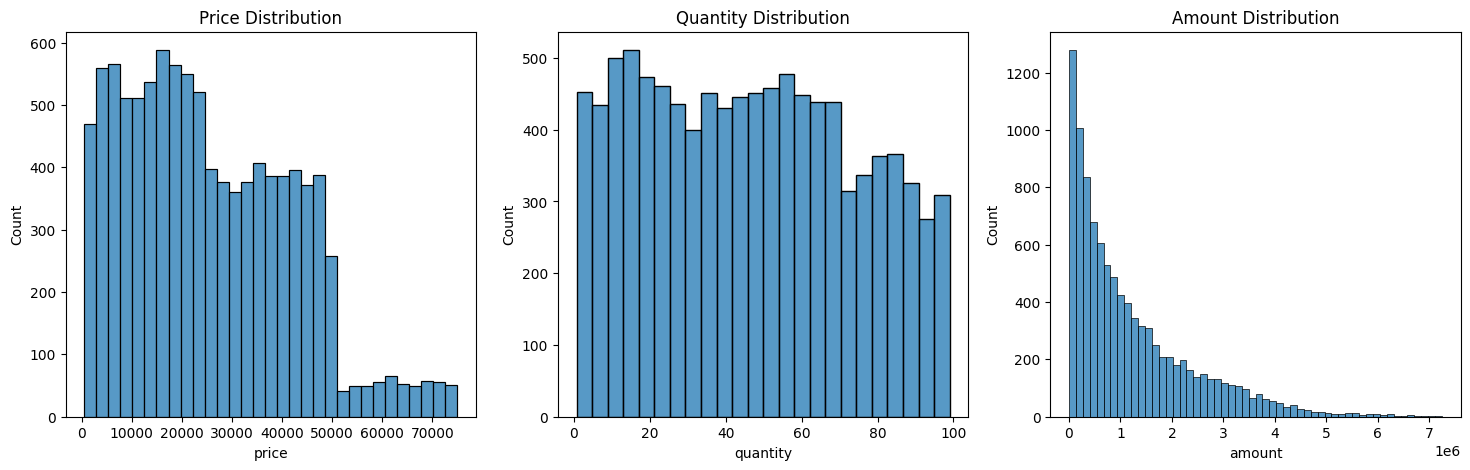

In [37]:
# 가격, 구매 수량, 총 구매 금액 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['price'], ax=axes[0])
axes[0].set_title('Price Distribution')

sns.histplot(data['quantity'], ax=axes[1])
axes[1].set_title('Quantity Distribution')

sns.histplot(data['amount'], ax=axes[2])
axes[2].set_title('Amount Distribution')

plt.show()

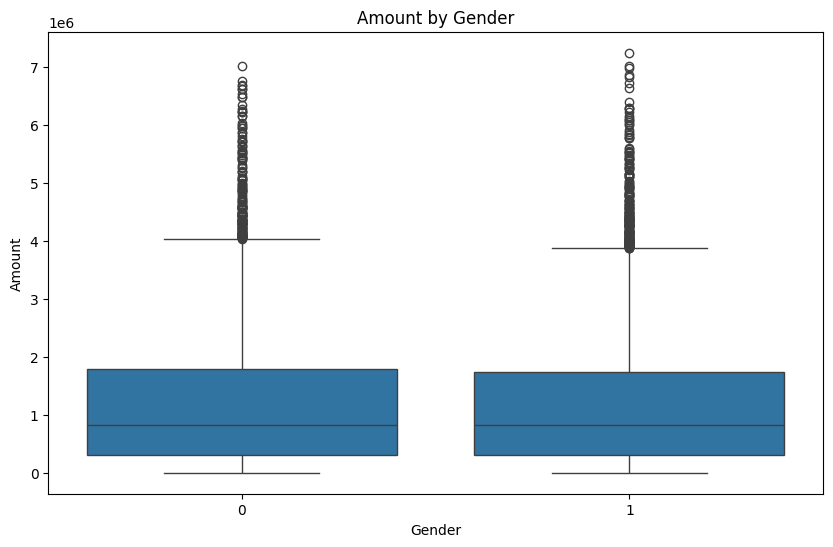

In [43]:
# 성별에 따른 총 구매 금액의 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='amount', data=data)
plt.title('Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.show()

In [45]:
# 성별에 따른 총 구매 금액의 차이 (t-test)
male_amount = data[data['gender'] == 0]['amount']
female_amount = data[data['gender'] == 1]['amount']
t_stat, p_value = ttest_ind(male_amount, female_amount)
t_stat, p_value

(0.11231538711197553, 0.9105755966354327)

In [46]:
# 연령대별 구매 금액 차이 (ANOVA)
age_groups = data['age_cat'].unique()
grouped_amount = [data[data['age_cat'] == age]['amount'] for age in age_groups]
f_stat, p_value_anova = f_oneway(*grouped_amount)
f_stat, p_value_anova

(0.5417486637520674, 0.744774827815103)

time
1     4.914112e+08
2     5.655339e+08
3     4.920055e+08
4     5.328890e+08
5     4.445690e+08
6     5.253039e+08
7     5.326511e+08
8     4.898008e+08
9     5.136751e+08
10    4.836101e+08
11    5.246801e+08
12    5.681655e+08
13    4.885327e+08
14    5.167508e+08
15    4.195540e+08
16    4.957824e+08
17    5.152892e+08
18    4.896160e+08
19    4.535236e+08
20    5.454709e+08
21    4.893326e+08
22    5.308826e+08
23    5.341105e+08
24    5.099692e+08
Name: amount, dtype: float64


<Axes: xlabel='amount', ylabel='Count'>

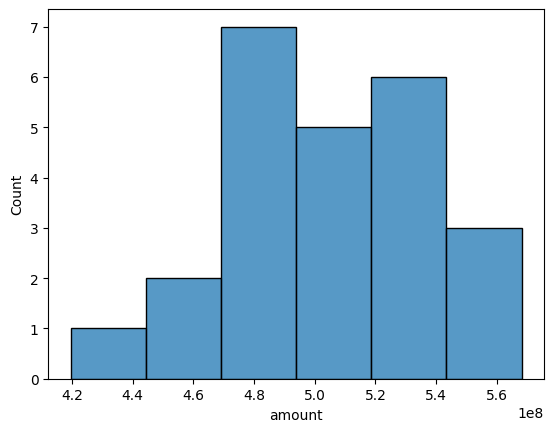

In [50]:
# 시간대별 구매 패턴 분석
time_pattern = data.groupby('time')['amount'].sum()
print(time_pattern)
sns.histplot(time_pattern)


Task. 통계적 분석 기법을 이용하여 첨부한 pur_10000.csv 데이터셋에 대하여 다음 인사이트가 반영되도록 데이터셋을 수정해서 df_pur로 만드는 과정을 보여줘.
- 가격, 구매 수량에 10개의 결측치 반영
-  가격, 구매 수량, 총 구매 금액 분포를 정규분포에 근사하도록 수정
- 성별에 따른 구매 구액의 분포에 이상치가 포함되지 않도록 수정
- 성별에 따른 총 구매 차이가 유의미 하도록 수정
- 연령대별 구매 금액 차이가 유의미 하도록 수정
- 시간대별 구매 패턴에 유의미한 인사이트 반영

In [57]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# 원본 데이터셋 로드
data = df_pur.copy()

# 1. 가격, 구매 수량에 10개의 결측치 반영
data.loc[data.sample(10).index, 'price'] = np.nan
data.loc[data.sample(10).index, 'quantity'] = np.nan

# 2. 가격, 구매 수량, 총 구매 금액 분포를 정규분포에 근사하도록 수정
np.random.seed(42)

# 가격 분포를 정규분포로 변환
mu_price, sigma_price = norm.fit(data['price'].dropna())
data['price'] = np.random.normal(mu_price, sigma_price, data.shape[0])

# 구매 수량 분포를 정규분포로 변환
mu_quantity, sigma_quantity = norm.fit(data['quantity'].dropna())
data['quantity'] = np.random.normal(mu_quantity, sigma_quantity, data.shape[0])

# 총 구매 금액 업데이트 (가격 * 수량)
data['amount'] = data['price'] * data['quantity']

# 3. 성별에 따른 구매 금액의 분포에 이상치가 포함되지 않도록 수정
# IQR (Interquartile Range) 방법을 사용하여 이상치 제거
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
data = data[(data['amount'] >= lower_whisker) & (data['amount'] <= upper_whisker)]

# 4. 성별에 따른 총 구매 차이가 유의미 하도록 수정
# 남성의 평균 구매 금액을 높이고, 여성의 평균 구매 금액을 낮춤
data.loc[data['gender'] == 0, 'amount'] *= 1.2  # 남성의 구매 금액 증가
data.loc[data['gender'] == 1, 'amount'] *= 0.8  # 여성의 구매 금액 감소

# 5. 연령대별 구매 금액 차이가 유의미 하도록 수정
# 각 연령대의 구매 금액에 차이를 부여
data.loc[data['age_cat'] == 1, 'amount'] *= 0.8  # 연령대 1
data.loc[data['age_cat'] == 2, 'amount'] *= 0.9  # 연령대 2
data.loc[data['age_cat'] == 3, 'amount'] *= 1.0  # 연령대 3
data.loc[data['age_cat'] == 4, 'amount'] *= 1.1  # 연령대 4
data.loc[data['age_cat'] == 5, 'amount'] *= 1.2  # 연령대 5
data.loc[data['age_cat'] == 6, 'amount'] *= 1.3  # 연령대 6

# 6. 시간대별 구매 패턴에 유의미한 인사이트 반영
# 특정 시간대 (예: 오후 3시~6시) 에 구매 금액을 증가시킴
data.loc[data['time'].between(15, 18), 'amount'] *= 1.5

# 수정된 데이터셋을 df_pur로 저장
df_pur = data

# 결과 확인
# desc_stats_modified = df_pur.describe()
# missing_values_modified = df_pur.isnull().sum()

# import ace_tools as tools

# tools.display_dataframe_to_user(name="Modified Descriptive Statistics", dataframe=desc_stats_modified)
# tools.display_dataframe_to_user(name="Modified Missing Values", dataframe=pd.DataFrame(missing_values_modified, columns=['Missing Values']))
df_pur.head()


,cusno,gender,region,pur_id,product,price,quantity,amount,date,day,time,age_cat,year
0,1001,0,4,2116615,10,33658.905091,27.767587,1.121552e+06,2021-02-19,금,4,3,2021
1,1001,0,4,2025304,20,23203.309121,38.021751,1.058677e+06,2020-05-24,일,4,3,2020
2,1001,0,4,2021552,20,36144.859004,29.997515,1.301107e+06,2020-06-02,화,22,3,2020
3,1001,0,4,2113811,10,50558.285318,49.455908,4.500731e+06,2021-01-29,금,18,3,2021
4,1001,0,4,2146825,10,21624.393483,79.332481,3.087930e+06,2021-09-02,목,18,3,2021


             cusno       gender       region        pur_id      product  \
count  9741.000000  9741.000000  9741.000000  9.741000e+03  9741.000000   
mean   1499.031516     0.485166     5.580639  2.079647e+06    19.965096   
std     287.532829     0.499806     2.889155  5.136860e+04     8.150208   
min    1001.000000     0.000000     1.000000  2.010007e+06    10.000000   
25%    1250.000000     0.000000     3.000000  2.029798e+06    10.000000   
50%    1496.000000     0.000000     6.000000  2.049671e+06    20.000000   
75%    1746.000000     1.000000     8.000000  2.129985e+06    30.000000   
max    2000.000000     1.000000    10.000000  2.149998e+06    30.000000   

              price     quantity        amount         time      age_cat  \
count   9741.000000  9741.000000  9.741000e+03  9741.000000  9741.000000   
mean   24813.727468    45.655093  1.310538e+06    12.473771     3.843035   
std    15966.604486    26.721358  1.300493e+06     6.940097     1.801522   
min   -39106.516250 

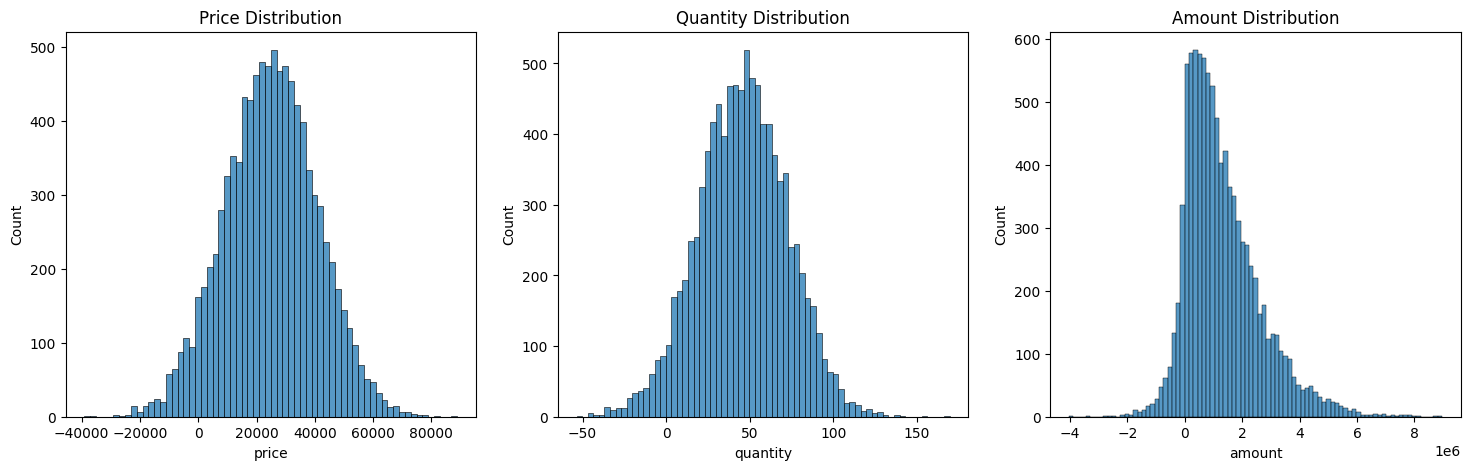

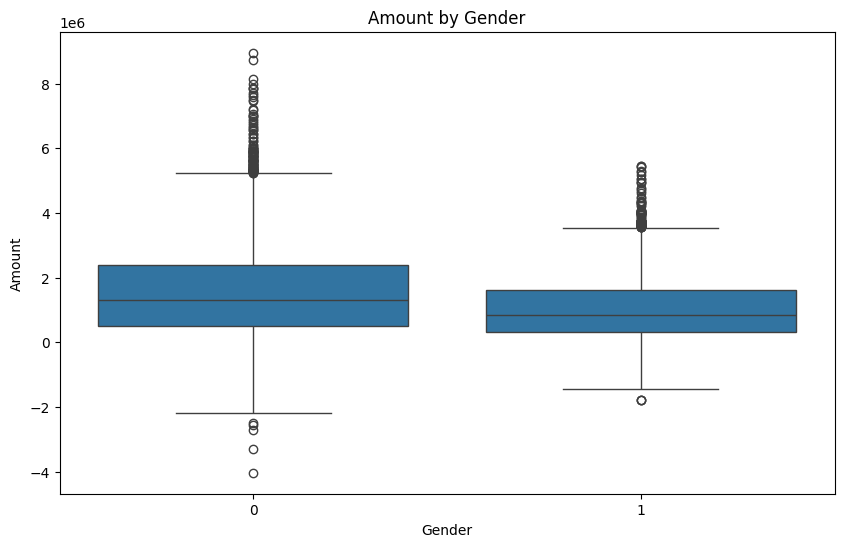

20.7154682268412 2.535585049408444e-93
64.13500972405225 4.5250869015215935e-66


time
1     1.228425e+06
2     1.246356e+06
3     1.284054e+06
4     1.189432e+06
5     1.248585e+06
6     1.216719e+06
7     1.204567e+06
8     1.186169e+06
9     1.191986e+06
10    1.100938e+06
11    1.184993e+06
12    1.133320e+06
13    1.244708e+06
14    1.149045e+06
15    1.808073e+06
16    1.938950e+06
17    1.853195e+06
18    1.955208e+06
19    1.273663e+06
20    1.214247e+06
21    1.175512e+06
22    1.277586e+06
23    1.121777e+06
24    1.093751e+06
Name: amount, dtype: float64

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 기술 통계량 계산
desc_stats = df_pur.describe()
print(desc_stats)

# 결측치 확인
missing_values = data.isnull().sum()
print(missing_values)

# 가격, 구매 수량, 총 구매 금액 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['price'], ax=axes[0])
axes[0].set_title('Price Distribution')

sns.histplot(data['quantity'], ax=axes[1])
axes[1].set_title('Quantity Distribution')

sns.histplot(data['amount'], ax=axes[2])
axes[2].set_title('Amount Distribution')

plt.show()

# 성별에 따른 총 구매 금액의 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='amount', data=data)
plt.title('Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.show()

# 성별에 따른 총 구매 금액의 차이 (t-test)
male_amount = data[data['gender'] == 0]['amount']
female_amount = data[data['gender'] == 1]['amount']
t_stat, p_value = ttest_ind(male_amount, female_amount)
print(t_stat, p_value)

# 연령대별 구매 금액 차이 (ANOVA)
age_groups = data['age_cat'].unique()
grouped_amount = [data[data['age_cat'] == age]['amount'] for age in age_groups]
f_stat, p_value_anova = f_oneway(*grouped_amount)
print(f_stat, p_value_anova)
# 시간대별 구매 패턴 분석
time_pattern = data.groupby('time')['amount'].mean()

time_pattern

